In [1]:
## K-Center Coreset
## Karan Vombatkere, Dec 2021

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import helper_functions as hf

In [2]:
class Coreset_kCenter:
    """
    Class to compute K-Center Coreset
    Parameters
    ----------
        x_arr : numpy array data from Coreset_Util
        k_val : Value of k for computing k-center Coreset
        epsilon : epsilon value for Coreset
    """
    
    #Initialize with parameters
    def __init__(self, x_arr, k_val, epsilon):
        self.x_array = np.array(x_arr)
        self.k = k_val
        self.epsilon = epsilon
        self.centers = None
    

    #Function to plot kcenters and x_array
    def plot2D_kcenters(self):
        if self.centers is None:
            print("k-centers not computed yet. Compute first and then plot")
            return None

        x_plt = [vec[0] for vec in self.x_array]
        y_plt = [vec[1] for vec in self.x_array]

        plt.scatter(x_plt, y_plt, s= 0.05, label = 'Points')

        c_x = [vec[0] for vec in self.centers]
        c_y = [vec[1] for vec in self.centers]
        plt.scatter(c_x, c_y, marker = '+', label = 'K-Centers')

        title_text = 'K-Center Plot'
        plt.title(title_text, fontsize=11)
        plt.ylabel('y')
        plt.xlabel('x')
        plt.xlim([1.25*min(x_plt), 1.25*max(x_plt)])
        plt.ylim([1.25*min(y_plt), 1.25*max(y_plt)])

        plt.legend(loc='lower right', fontsize=9)
        plt.rcParams["figure.figsize"] = (8,8)
        plt.show()

        return None



    #Compute Greedy k-center with polynomial 2-approximation
    def greedy_kcenter(self):

        #Randomly select a point and add to centers
        randomPointIndex = np.random.randint(0,len(self.x_array)+1)
        s_1 = self.x_array[randomPointIndex]
        self.centers = np.array([s_1])

        #Initialize all distances initially to s_1
        point_distances = [hf.dist(self.x_array[i], s_1) for i in range(len(self.x_array))]

        while len(self.centers) < self.k:
            #Get the farthest point to add to centers
            max_point_index = point_distances.index(max(point_distances))
            maximum_dist_point = self.x_array[max_point_index]

            self.centers = np.vstack([self.centers, maximum_dist_point])
            
            #Update point distances
            point_distances = [min(hf.dist(self.x_array[i], maximum_dist_point), point_distances[i]) for i in range(len(self.x_array))]

           
        return self.centers


    
    

In [3]:
#Test data
x_arr = []
for i in range(1000):
    x_val, y_val = np.random.randint(-100,101), np.random.randint(-100,101)
    x_arr.append([x_val, y_val])

In [4]:
test_kcenter = Coreset_kCenter(x_arr, 12, 0.2)

In [5]:
test_kcenter.greedy_kcenter()

[-100  -96]
[-96  99]
[ 32 -97]
[-37   0]
[ 4 96]
[92 99]
[ 98 -60]
[ 29 -29]
[-35 -77]
[-97  28]
[-92 -33]


array([[  73,   23],
       [-100,  -96],
       [ -96,   99],
       [  32,  -97],
       [ -37,    0],
       [   4,   96],
       [  92,   99],
       [  98,  -60],
       [  29,  -29],
       [ -35,  -77],
       [ -97,   28],
       [ -92,  -33]])

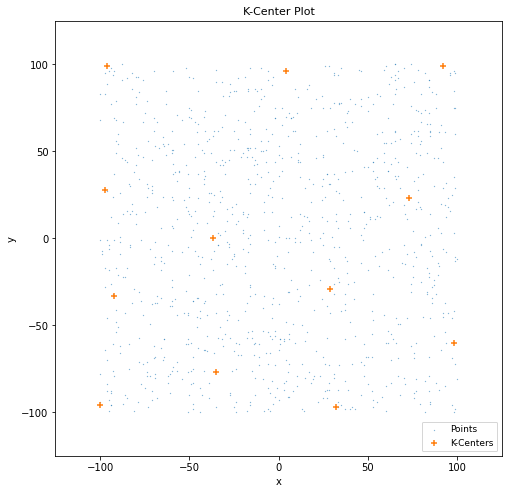

In [7]:
test_kcenter.plot2D_kcenters()